## Final Project Submission

Please fill out:
* Student name: Jane Njuguna
* Student pace: full time
* Scheduled project review date/time:26/08/2022 
* Instructor name: Luccile Kaleha
* Blog post URL:


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv

%matplotlib inline

# Loading data

In [2]:
#loading csv file
bom_movie = pd.read_csv("zippedData/bom.movie_gross.csv.gz",error_bad_lines= False,encoding = "Latin-1")

In [3]:
#loading im.db database
conn = sqlite3.connect("zippedData/im.db")

# Data Understanding

### Data understanding for bom_movie dataset

In [4]:
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
#Displaying the head of bom_movie dataset
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#Displaying the tail of bom_movie dataset
bom_movie.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
#statistical data of bom_movie dataset
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [8]:
#Information about the loade
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#The shape of the bom_movie dataset
bom_movie.shape

(3387, 5)

In [10]:
bom_movie.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

### Data understanding for im.db dataset

In [11]:
# Finding the table names 
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
#Fetching the results
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

##### To get more information for the table and column names for each table in the im.db database

In [247]:
movie_basics = pd.read_sql("""SELECT *
FROM movie_basics""",conn).head()
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
pd.read_sql("""SELECT *
FROM directors""",conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [14]:
pd.read_sql("""SELECT *
FROM known_for""",conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [15]:
pd.read_sql("""SELECT *
FROM movie_akas""",conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [16]:
pd.read_sql("""SELECT *
FROM movie_ratings""",conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
pd.read_sql("""SELECT *
FROM persons""",conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [18]:
pd.read_sql("""SELECT *
FROM principals""",conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [19]:
pd.read_sql("""SELECT *
FROM writers""",conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# Data Cleaning

#### Data cleaning for bom_movie dataset

In [20]:
#Checking the null values
bom_movie.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [21]:
#checking the number of null values in each column
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df[column_list]

In [23]:
coerce_df_columns_to_numeric(bom_movie, 'foreign_gross')

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [24]:
# Finding the mean of foreign_gross that has null values
foreign_gross_mean = bom_movie.foreign_gross.mean()
foreign_gross_mean

75057041.62549213

In [25]:
# Finding the median of foreign_gross that has null values
foreign_gross_median = bom_movie.foreign_gross.median()
foreign_gross_median

18900000.0

In [26]:
#Finding the median of foreign_gross that has null values
foreign_gross_mode = bom_movie.foreign_gross.mode()
foreign_gross_mode

0    1200000.0
dtype: float64

In [27]:
#Replacing missing values foreign_gross column
bom_movie.foreign_gross.fillna(foreign_gross_median, inplace=True)

In [28]:
#Replacing missing values foreign_gross column
domestic_gross_median = bom_movie.domestic_gross.median()

In [29]:
# Replace the null foreign gross with the median
bom_movie.domestic_gross.fillna(domestic_gross_median, inplace=True)

In [30]:
#Dropping remaining null values in bom_movie
bom_movie.dropna(inplace = True)
bom_movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [82]:
#Checking for duplicates in bom_movie
bom_movie.duplicated().sum()

0

In [83]:
#Function to find outliers
def finding_outlier(data):
    q3=data.quantile(0.75)
    q1=data.quantile(0.25)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

In [84]:
#Finding outiers in bom_movie dataset
finding_outlier(bom_movie)

,title,studio,domestic_gross,foreign_gross,year
0,NaN,NaN,415000000.0,652000000.0,NaN
1,NaN,NaN,334200000.0,691300000.0,NaN
2,NaN,NaN,296000000.0,664300000.0,NaN
3,NaN,NaN,292600000.0,535700000.0,NaN
4,NaN,NaN,238700000.0,513900000.0,NaN
...,...,...,...,...,...
3382,NaN,NaN,NaN,NaN,NaN
3383,NaN,NaN,NaN,NaN,NaN
3384,NaN,NaN,NaN,NaN,NaN
3385,NaN,NaN,NaN,NaN,NaN


In [85]:
#Number of outlier in domestic gross column
finding_outlier(bom_movie.domestic_gross).count()

408

In [118]:
#Number of outlier in foreign gross column
finding_outlier(bom_movie.foreign_gross).count()

619

#### Data cleaning for im.db dataset

In [267]:
#joined movie_ratings and  movie_basics tables
movie_rating_basics = pd.read_sql("""SELECT *
FROM movie_ratings
JOIN movie_basics
USING (movie_id)""",conn)
movie_rating_basics

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [268]:
#Renaming averagerating column to average_rating
movie_rating_basics.columns = movie_rating_basics.columns.str.lower().str.replace('averagerating', 'average_rating')

In [269]:
#Renaming numvotes column to num_votes
movie_rating_basics.columns = movie_rating_basics.columns.str.lower().str.replace('numvotes', 'num_votes')
movie_rating_basics.head()

,movie_id,average_rating,num_votes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [270]:
#checking number of null values in movie_rating_basics 
movie_rating_basics.isnull().sum()

movie_id              0
average_rating        0
num_votes             0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [271]:
#shape of movie_rating_basics
movie_rating_basics.shape

(73856, 8)

In [272]:
# Filling missing values in genres column 
movie_rating_basics.genres.fillna('Missing', inplace=True)
movie_rating_basics

,movie_id,average_rating,num_votes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [273]:
#Dropping remaining null values in movie_rating_basics
movie_rating_basics.dropna(inplace = True)
movie_rating_basics.isnull().sum()

movie_id           0
average_rating     0
num_votes          0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [275]:
# Checking if there are duplicate values in movie_rating_basics
movie_rating_basics.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
73849    False
73851    False
73852    False
73854    False
73855    False
Length: 66236, dtype: bool

In [276]:
# Checking the number of outliers in each column in movie_rating_basics dataset using function
finding_outlier(movie_rating_basics).count()

movie_id               0
average_rating      1327
num_votes          10472
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
dtype: int64

In [277]:
movie_rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   average_rating   66236 non-null  float64
 2   num_votes        66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           66236 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


# Data Analysis

## Data analysis for bom_movie

In [278]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 318.5+ KB


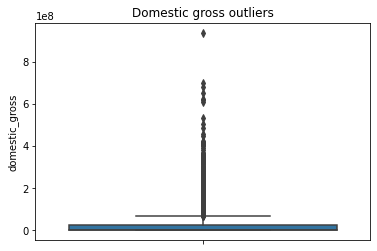

In [279]:
#checking outliers for domestic gross column in bom_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = bom_movie.domestic_gross)
ax.set_title("Domestic gross outliers")
plt.show()

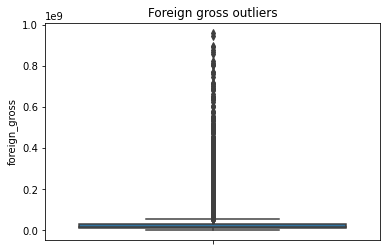

In [280]:
#checking outliers for foreign gross column in bom_movie dataset
fig, ax = plt.subplots()
sns.boxplot(y = bom_movie.foreign_gross)
ax.set_title("Foreign gross outliers")
plt.show()

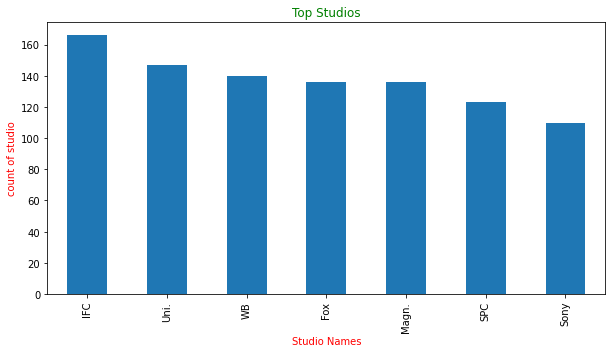

In [281]:
#Finding the studios that are leading 
fig,ax = plt.subplots(figsize = (10,5))
bom_movie.studio.value_counts().head(7).plot.bar()
plt.xlabel("Studio Names",c = "r")
plt.ylabel("count of studio",c ="r")
plt.title("Top Studios",color= "g");

#### Measure of central tendancies for bom_movie dataset

In [282]:
# Mean
def mean(data):
    output = sum(data) / len(data)
    return output

# mean of domestic gross in bom_movie
print(mean(bom_movie.domestic_gross))

# mean of foreign gross in bom_movie
print(mean(bom_movie.foreign_gross))

28561064.15730337
52623864.15819042


In [283]:
# median
def median(data):
    data_sorted = sorted(data)
    length_of_data = len(data_sorted)
    middle_number = (length_of_data - 1) // 2
    if middle_number % 2:
        return data_sorted[middle_number]
    else:
        return (data_sorted[middle_number] + data_sorted[middle_number + 1]) / 2.0
    

# median of domestic gross in bom_movie
print(median(bom_movie.domestic_gross))

# mean of foreign gross in bom_movie
print(median(bom_movie.foreign_gross))

1400000.0
18900000.0


In [284]:
# Mode
print(bom_movie.domestic_gross.mode())
print(bom_movie.foreign_gross.mode())
print(bom_movie.studio.mode())
print(bom_movie.year.mode())
print(bom_movie.title.mode())

0    1400000.0
dtype: float64
0    18900000.0
dtype: float64
0    IFC
dtype: object
0    2015
dtype: int64
0    Bluebeard
dtype: object


In [285]:
# Range
print(bom_movie.domestic_gross.max() - bom_movie.domestic_gross.min())
print(bom_movie.foreign_gross.max() - bom_movie.foreign_gross.min())

936699900.0
960499400.0


In [286]:
# standard deviation
print("domestic_gross standard deviation:", bom_movie.domestic_gross.std())
print("foreign_gross standard deviation:", bom_movie.foreign_gross.std())     

domestic_gross standard deviation: 66791614.601031914
foreign_gross standard deviation: 110074384.71875076


In [287]:
# Variance
print("domestic_gross standard deviation:", bom_movie.domestic_gross.var())
print("foreign_gross standard deviation:", bom_movie.foreign_gross.var()) 

domestic_gross standard deviation: 4461119781012780.0
foreign_gross standard deviation: 1.211637017121155e+16


C:\Users\janen\Documents\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\janen\Documents\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



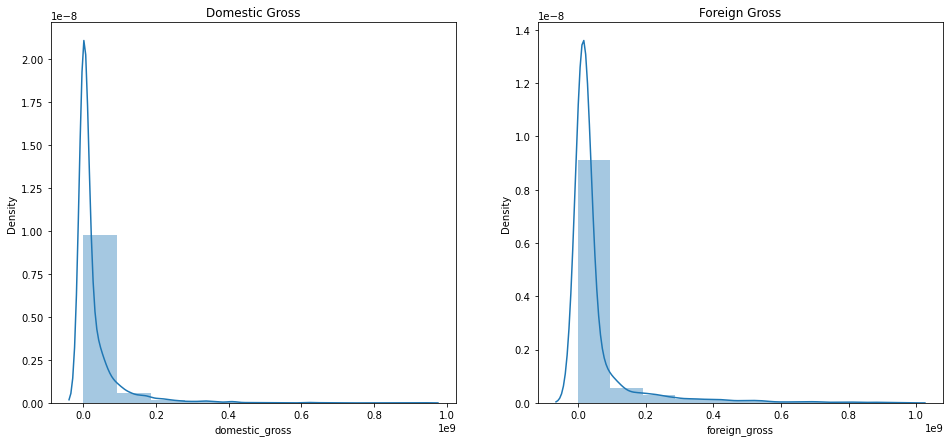

In [301]:
# Plotting a histogram to show skewness
n_bins = 10
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (16,7))
sns.distplot(bom_movie.domestic_gross, ax=ax1, bins= n_bins)
sns.distplot(bom_movie.foreign_gross, ax=ax2, bins= n_bins)
ax1.set_title('Domestic Gross')
ax2.set_title('Foreign Gross');

## Data analysis for movie_rating_basics

In [290]:
movie_rating_basics.head()

,movie_id,average_rating,num_votes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [291]:
movie_rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   average_rating   66236 non-null  float64
 2   num_votes        66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           66236 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.0+ MB


In [292]:
# Finding outliers in movie_rating_basics
finding_outlier(movie_rating_basics).count()

movie_id               0
average_rating      1327
num_votes          10472
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
dtype: int64

In [293]:
# Count of how many times a genre appearing
movie_rating_basics.genres.value_counts()

Drama                          10189
Documentary                     9149
Comedy                          4604
Comedy,Drama                    2451
Horror                          2232
                               ...  
Action,Family,Western              1
Fantasy,Horror,Romance             1
Family,Sci-Fi,Thriller             1
Documentary,Musical,Mystery        1
Animation,Family,Mystery           1
Name: genres, Length: 907, dtype: int64

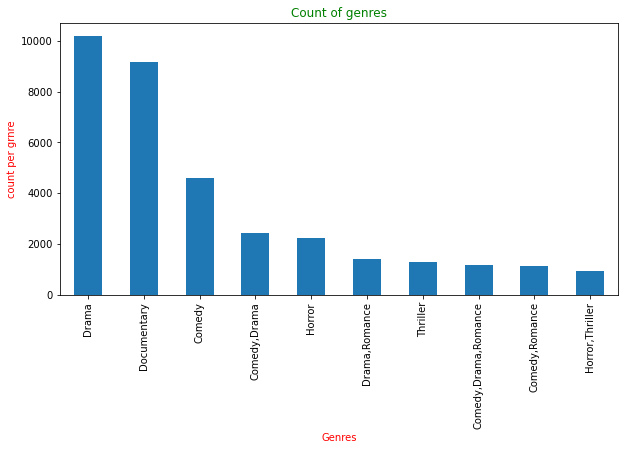

In [294]:
# Plotting a bar graph for the value counts of genre
fig,ax = plt.subplots(figsize = (10,5))
movie_rating_basics.genres.value_counts().head(10).plot.bar()
plt.xlabel("Genres",c = "r")
plt.ylabel("count per grnre",c ="r")
plt.title("Count of genres",color= "g");

# Drama,Documentary,comedy,comedy Drama and horror are the top leading genres 

In [305]:
# Sorting values by average_rating
movie_rating_basics.sort_values(by = "average_rating",ascending = False)

,movie_id,average_rating,num_votes,primary_title,original_title,start_year,runtime_minutes,genres
7017,tt6295832,10.0,5,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
64754,tt7227500,10.0,6,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,70.0,"Documentary,History"
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
34334,tt4960818,10.0,8,Revolution Food,Revolution Food,2015,70.0,Documentary
...,...,...,...,...,...,...,...,...
43001,tt3185040,1.0,307,Ryûsei,Ryûsei,2013,78.0,"Drama,Family"
63269,tt7923374,1.0,674,Badang,Badang,2018,105.0,"Comedy,Fantasy"
62893,tt3216288,1.0,440,One Night: Choice of Evil,One Night: Choice of Evil,2010,79.0,"Comedy,Drama,Romance"
25572,tt8313262,1.0,20,Glaza i mir. Chast 1,Glaza i mir. Chast 1,2018,90.0,Drama


In [313]:
finding_outlier(movie_rating_basics).count()

movie_id               0
average_rating      1327
num_votes          10472
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
dtype: int64

In [316]:
# Mean for movie_rating_basics
mean(movie_rating_basics.runtime_minutes)

94.6540400990398

In [319]:
# Mode
print(movie_rating_basics.genres.mode())
print(movie_rating_basics.runtime_minutes.mode())

0    Drama
dtype: object
0    90.0
dtype: float64


In [306]:
movie_rating_basics.num_votes.corr(movie_rating_basics.runtime_minutes, method="pearson") 

0.012472154480321108

In [308]:
movie_rating_basics.average_rating.corr(movie_rating_basics.runtime_minutes, method="pearson")

-0.006963469265963989

In [309]:
movie_rating_basics.average_rating.corr(movie_rating_basics.num_votes, method="pearson")

0.048493740907353367